In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook

In [3]:
# data collection

data_BD = pd.read_excel('data_BD.xlsx')
data_BD.set_index(['Subject Descriptor'], inplace = True)
data_BD.drop(['Country', 'Units', 'Scale', 'Country/Series-specific Notes', 'Estimates Start After'], axis = 1, inplace = True)
dB = data_BD.T

wbB = pd.read_csv('wb_BD.csv', skipfooter = 5)
wbB.drop(['ï»¿Country Name', 'Country Code', 'Series Code', '2019 [YR2019]'], axis = 1, inplace = True)
wbB.set_index(['Series Name'], inplace = True)
wbB = wbB.T
y = []
[y.append(name[:4]) for name in wbB.index]
wbB['Year'] = y
wbB.set_index(['Year'], inplace = True)
wbB.index = wbB.index.astype('int64')

bd = pd.merge(dB, wbB, how = 'right', left_index = True, right_index = True )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [4]:
# shaping data

def growth(item):
    growth = [0]
    [growth.append(item.iloc[i+1] - item.iloc[i]) for i in range(len(item)-1)]
    return growth

bd['Inflation Growth'] = growth(bd['Inflation, average consumer prices'])
bd['GDP growth change'] = growth(bd['GDP growth (annual %)'])

<IPython.core.display.Javascript object>


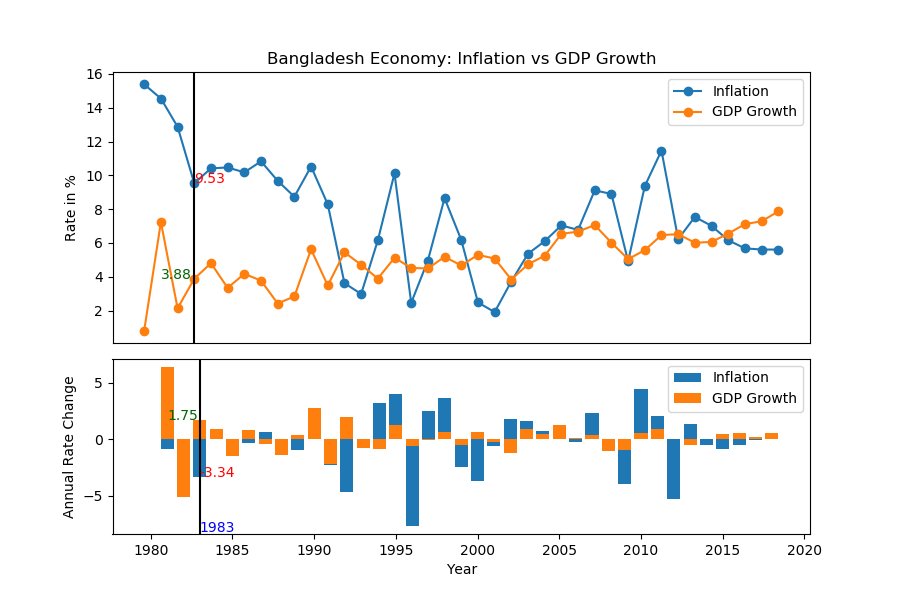

7

In [5]:
# plotting

plt.figure(figsize = (9,6))
gspec = gridspec.GridSpec(5, 1)

bottom = plt.subplot(gspec[3:, 0])
bottom.bar(bd.index, bd['Inflation Growth'], label = 'Inflation')
bottom.bar(bd.index, bd['GDP growth change'], label = 'GDP Growth')
bottom.set_ylabel('Annual Rate Change')
bottom.set_xlabel('Year')
bottom.legend()

top = plt.subplot(gspec[:3, 0])
top.plot(bd['Inflation, average consumer prices'], '-o', label = 'Inflation')
top.plot(bd['GDP growth (annual %)'], '-o', label = 'GDP Growth')
top.set_ylabel('Rate in %')
top.set_title('Bangladesh Economy: Inflation vs GDP Growth')
top.set_xticks([])
top.legend()

def onclick(event):
    plt.cla()
    x = event.xdata

    if (float(x) - int(x)) > 0.5 : x = int(x) + 1
    else: x = int(x)

    gspec = gridspec.GridSpec(5, 1)
    bottom = plt.subplot(gspec[3:, 0])
    bottom.bar(bd.index, bd['Inflation Growth'], label = 'Inflation')
    bottom.bar(bd.index, bd['GDP growth change'], label = 'GDP Growth')
    bottom.set_ylabel('Annual Rate Change')
    bottom.set_xlabel('Year')
    plt.axvline(x, color = 'k')
    plt.annotate('{:.2f}'.format(bd.loc[x]['Inflation Growth']), [x,bd.loc[x]['Inflation Growth']], color = 'r')
    plt.annotate('{:.2f}'.format(bd.loc[x]['GDP growth change']), [(x-2),bd.loc[x]['GDP growth change']], color = 'darkgreen')
    plt.annotate('{}'.format(x), [x,-8.2], color = 'b')
    bottom.legend()

    top = plt.subplot(gspec[:3, 0])
    top.set_ylabel('Rate in %')
    top.plot(bd['Inflation, average consumer prices'], '-o', label = 'Inflation')
    top.plot(bd['GDP growth (annual %)'], '-o', label = 'GDP Growth')
    top.set_title('Bangladesh Economy: Inflation vs GDP Growth')
    top.set_xticks([])
    plt.axvline(x, color = 'k')
    plt.annotate('{:.2f}'.format(bd.loc[x]['Inflation, average consumer prices']), [x,bd.loc[x]['Inflation, average consumer prices']], color = 'r')
    plt.annotate('{:.2f}'.format(bd.loc[x]['GDP growth (annual %)']), [(x-2),bd.loc[x]['GDP growth (annual %)']], color = 'darkgreen')
    top.legend()
    plt.show()


plt.gcf().canvas.mpl_connect('button_press_event', onclick)